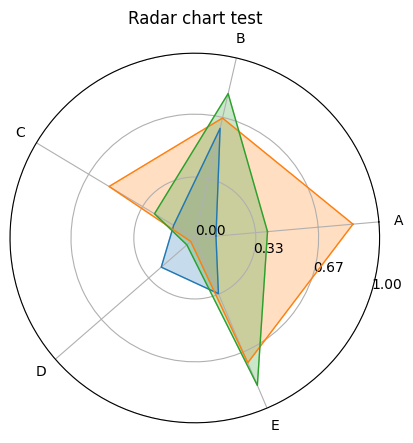

In [ ]:
from typing import List, Optional, Union

import numpy as np
from numpy.typing import NDArray
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.colors import Colormap
import matplotlib

np.random.seed(43)


def radar_chart(  # noqa: D417
    label: List[str],
    data: NDArray,
    cmap: Union[Colormap, str] = "tab10",
    ax: Optional[Axes] = None,
    show_figure: bool = True,
    show_grid: bool = True,
    rotation: int = 0,
    num_ticks: int = 3,
    vmax: Optional[int] = None,
    vmin: int = 0,
    title: Optional[str] = None,
    opacity: float = 0.25,
) -> Axes:
    """Generate radar chart with matplotlib.

    Args:
        labels: List of labels to annotate plot.
    """
    # Check length and shape of labels and data array
    assert len(label) > 1, "At least 1 label is required."

    if len(data.shape) == 1:
        # Reshape data array if only 1 dim
        data = np.array([data])
    elif len(data.shape) == 2:
        pass
    else:
        raise ValueError("Only data as 1 or 2 dimensional arrays are supported.")

    assert len(label) == data.shape[1]

    # Generate angles for axes in polar plot
    theta = np.linspace(0, 2 * np.pi, len(label), endpoint=False)

    # If no axes are given as argument, generate them
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, polar=True)

    # Get colormap for polygons
    if isinstance(cmap, str):
        cmap = matplotlib.colormaps.get_cmap(cmap)
    elif isinstance(cmap, Colormap) is False:
        raise ValueError("Type of argument 'cmap' not supported")

    if cmap.N > 20:
        norm = plt.Normalize(vmin=0, vmax=data.shape[0] - 1)
    else:
        norm = plt.Normalize(vmin=0, vmax=cmap.N - 1)

    for index, data_item in enumerate(data):
        ax.plot(
            np.concatenate((theta, [theta[0]])),
            np.concatenate((data_item, [data_item[0]])),
            linewidth=1,
            color=cmap(norm(index)),
            marker=None,
            alpha=1,
        )
        ax.fill(
            np.concatenate((theta, [theta[0]])),
            np.concatenate((data_item, [data_item[0]])),
            alpha=opacity,
            color=cmap(norm(index)),
        )

    # TODO: add estimation of vmax and vmin
    # if vmax is None:
    #     vmax = np.round(np.max(np.random.rand(5))

    ax.set_rticks(np.round(np.linspace(vmin, vmax, num_ticks + 2), 2))  # Less radial ticks
    ax.set_rlabel_position(-22)  # Move radial labels away from plotted line

    ax.set_thetagrids(theta * 180 / np.pi, label)
    ax.set_theta_offset(rotation / 180 * np.pi)

    # Add/remove grid
    ax.grid(show_grid)

    if title is not None:
        ax.set_title(title, loc="center")

    # TODO: add legend

    if show_figure is True:
        plt.show()
    else:
        return ax


radar_chart(
    label=["A", "B", "C", "D", "E"],
    # data=np.random.rand(5),
    data=np.array([np.random.rand(5), np.random.rand(5), np.random.rand(5)]),
    rotation=5,
    num_ticks=2,
    vmin=0,
    vmax=1,
    title="Radar chart test",
    # cmap="viridis",
)